In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier

random_state = 42

In [3]:
def read_dataset(path, sep=';', encoding='utf-8-sig', low_memory=False):
    return pd.read_csv(path, sep=sep, encoding=encoding, low_memory=low_memory)

subjects_bak_spec = read_dataset("../../../../../data/datasets/filtered/subjects_bak_spec_filtered_dbscan.csv")
subjects_magistr = read_dataset("../../../../../data/datasets/filtered/subjects_magistr_filtered_dbscan.csv")

In [4]:
X_s_bak_spec = subjects_bak_spec.drop(columns=["Таргет"])
y_s_bak_spec = subjects_bak_spec["Таргет"]

X_train_s_bak_spec, X_test_s_bak_spec, y_train_s_bak_spec, y_test_s_bak_spec = train_test_split(
    X_s_bak_spec,
    y_s_bak_spec,
    test_size=0.2,
    random_state=random_state
)

X_s_magistr = subjects_magistr.drop(columns=["Таргет"])
y_s_magistr = subjects_magistr["Таргет"]

X_train_s_magistr, X_test_s_magistr, y_train_s_magistr, y_test_s_magistr = train_test_split(
    X_s_magistr,
    y_s_magistr,
    test_size=0.2,
    random_state=random_state
)


🔄 Используется стекинг. Обучение мета-модели...
✅ Стекинг успешно обучен.

🎯 Лучший порог: 0.010, F1 для класса 1: 0.450
{'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
🧠 Лучшая модель: StackingClassifier(cv=StratifiedKFold(n_splits=3,
        random_state=RandomState(MT19937) at 0x1E673700540, shuffle=False),
                   estimators=[('hgb',
                                HistGradientBoostingClassifier(class_weight='balanced',
                                                               early_stopping=True,
                                                               max_depth=5,
                                                               max_iter=50,
                                                               min_samples_leaf=5,
                                                               random_state=42,
                                                               scoring='f1')),
                               

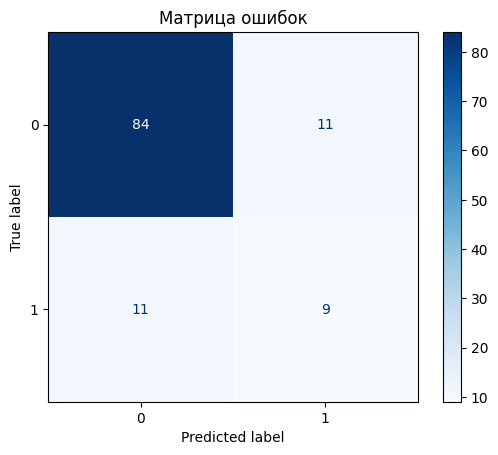


📌 Feature Importances:
                                            feature  importance
37                      Позиция студента в рейтинге    0.275763
7                  Полных лет на момент поступления    0.118814
2                           Балл за инд. достижения    0.054229
9                           Общее количество долгов    0.052448
3                                          Контракт    0.040704
31                            Код направления 1: 11    0.008710
4                             Нуждается в общежитии    0.007949
6                                               Пол    0.002879
5                      Иностранный абитуриент (МОН)    0.000000
28                                       PostSoviet    0.000000
29                                           others    0.000000
16         всероссийская олимпиада школьников (ВОШ)    0.000000
12                          Human Development Index    0.000000
13                                     Особая квота    0.000000
18              

C:\Users\333\AppData\Local\Temp\ipykernel_8112\3763144792.py:211: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')


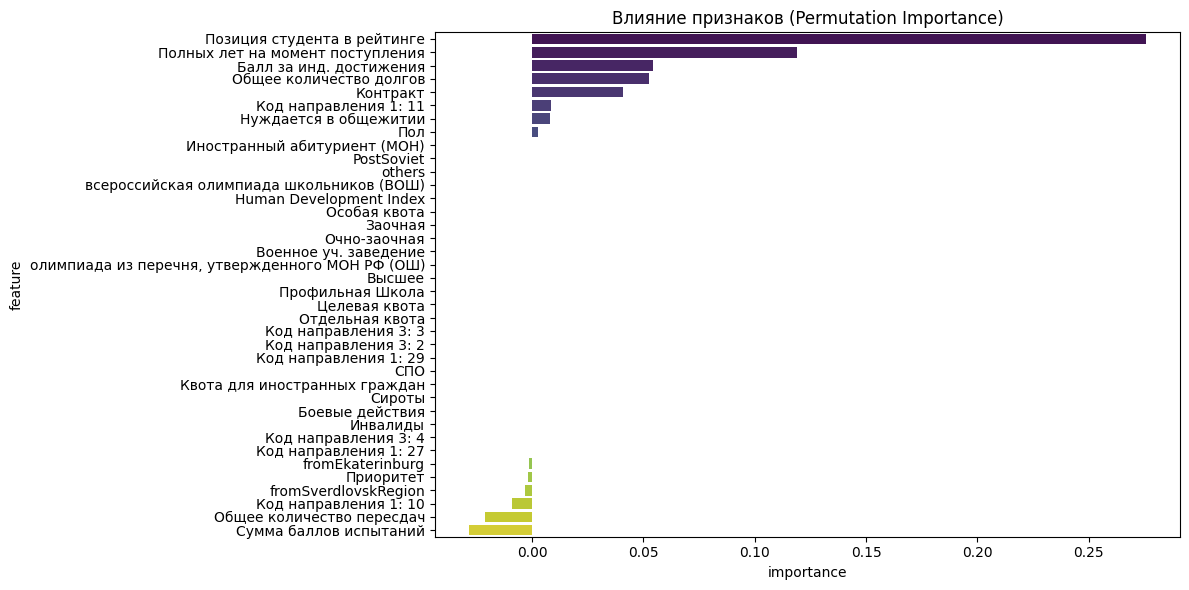

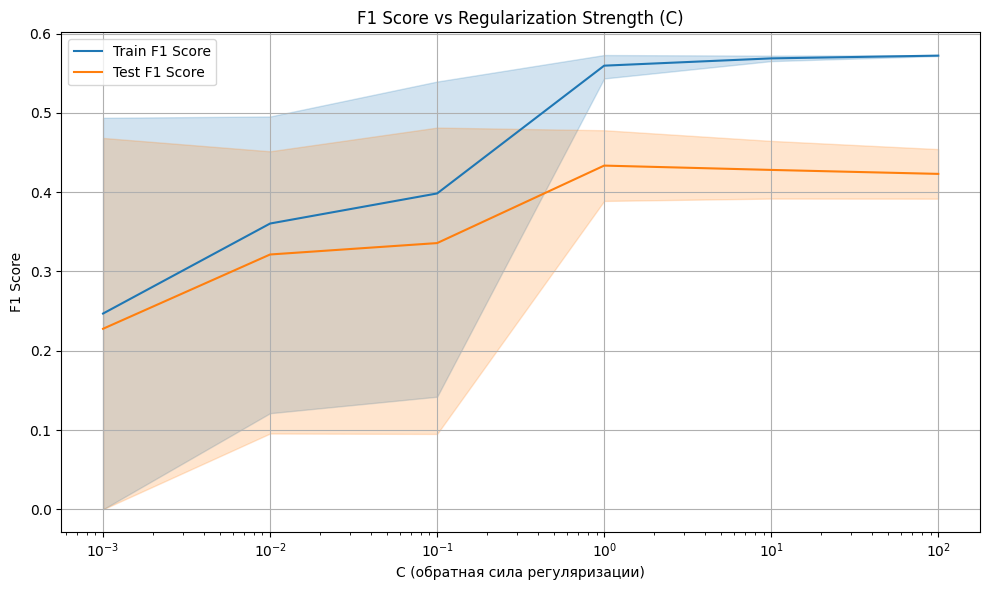

C:\Users\333\anaconda3\envs\pp\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\333\anaconda3\envs\pp\lib\site-packages\joblib\_utils.py", line 72, in __call__
    return self.func(**kwargs)
  File "C:\Users\333\anaconda3\envs\pp\lib\site-packages\joblib\parallel.py", line 598, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\333\anaconda3\envs\pp\lib\site-packages\joblib\parallel.py", line 598, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\Users

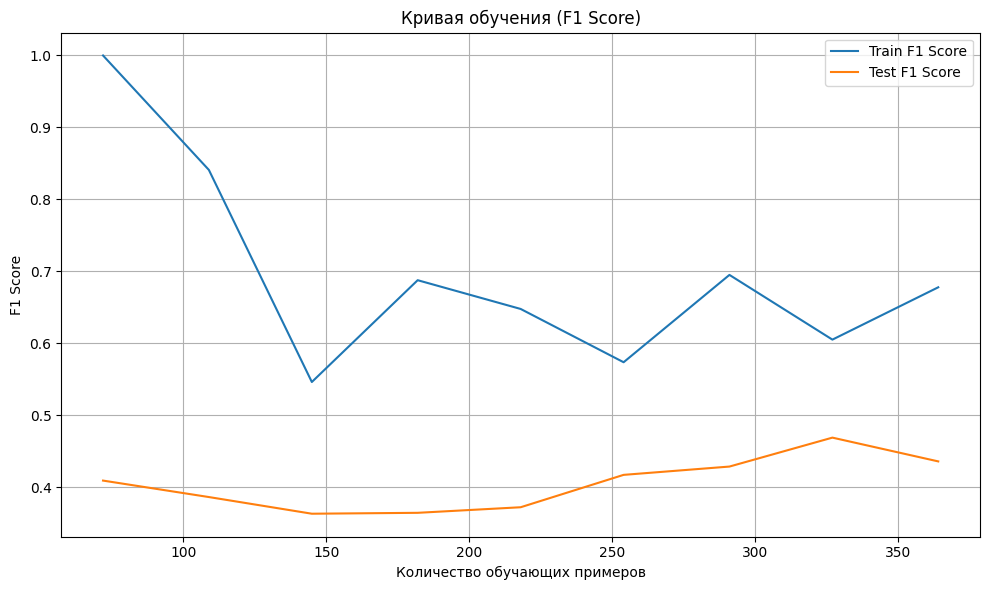

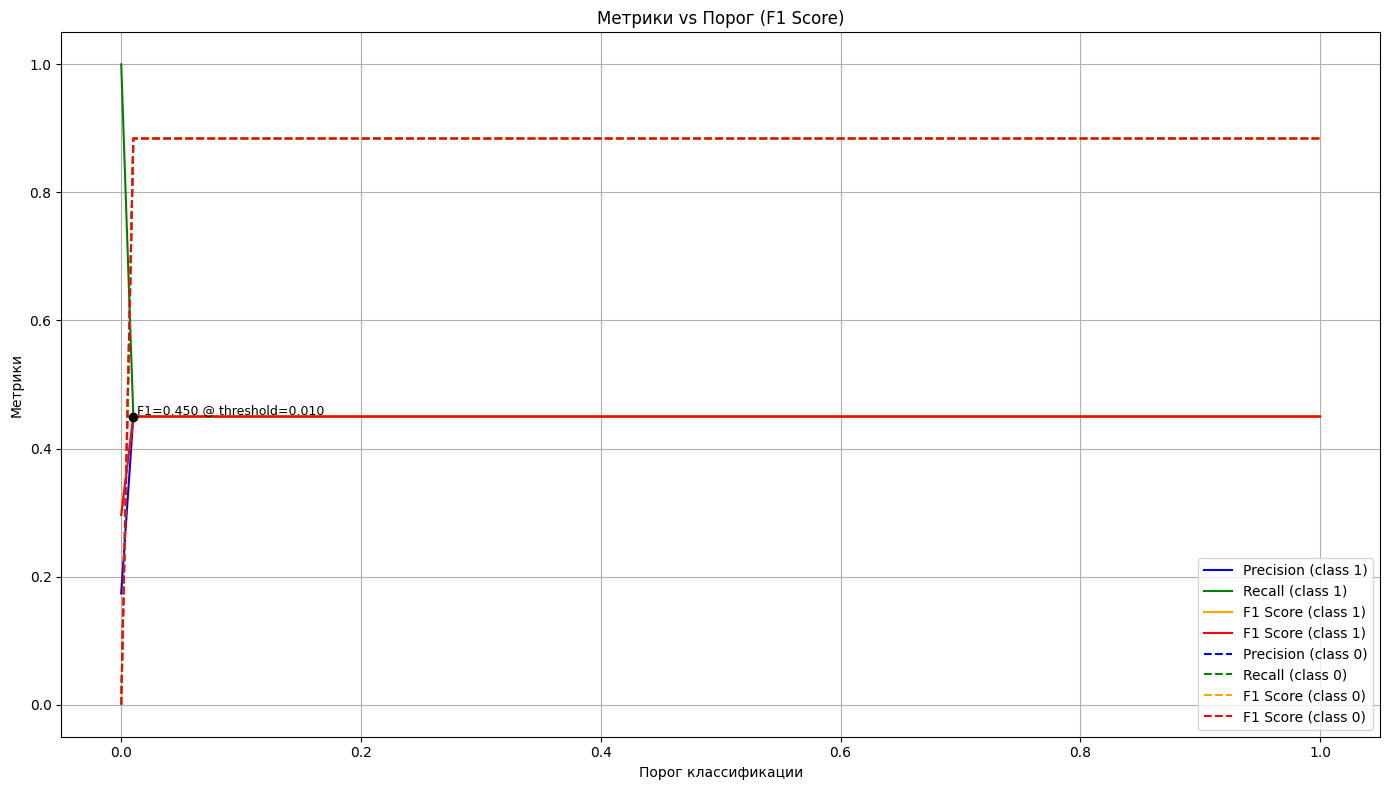

In [5]:
'''-----------------------------------------------------------------------------------------------------
                                        ИМПОРТ НЕОБХОДИМЫХ БИБЛИОТЕК
-----------------------------------------------------------------------------------------------------'''

import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, learning_curve, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, fbeta_score, make_scorer, precision_recall_fscore_support, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=3)

'''-----------------------------------------------------------------------------------------------------
                                            НАСТРОЙКИ
-----------------------------------------------------------------------------------------------------'''

BETA = 1

USE_STACKING = True

scale_pos_weight = 6.60

stacking_estimators = [
    ('hgb', HistGradientBoostingClassifier(
        class_weight='balanced',
        early_stopping=True,
        max_depth=5,
        max_iter=50,
        min_samples_leaf=5,
        random_state=42,
        scoring='f1'
    )),

    ('xgb', XGBClassifier(
        colsample_bytree=1.0,
        learning_rate=0.2,
        max_depth=6,
        min_child_weight=5,
        n_estimators=150,
        subsample=1.0,
        eval_metric='logloss',
        use_label_encoder=False,
        scale_pos_weight=scale_pos_weight,
        random_state=42
    )),
]

'''-----------------------------------------------------------------------------------------------------
                                            ПОДГОТОВКА ПАЙПЛАЙНА
-----------------------------------------------------------------------------------------------------'''

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=42, max_iter=1000))
])

param_grid = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2'],
    'clf__solver': ['liblinear'],
    'clf__class_weight': [None, 'balanced']
}

custom_scorer = make_scorer(fbeta_score, beta=BETA, pos_label=1)

'''-----------------------------------------------------------------------------------------------------
                                                ОБУЧЕНИЕ МОДЕЛИ
-----------------------------------------------------------------------------------------------------'''

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=StratifiedKFold(n_splits=3),
    scoring=custom_scorer,
    n_jobs=-1,
    return_train_score=True
)

grid_search.fit(X_train_s_magistr, y_train_s_magistr)

best_model = grid_search.best_estimator_
joblib.dump(best_model, '../../../../../data/models/final/filtered/ansamble_s_magistr_lof.joblib')

'''-----------------------------------------------------------------------------------------------------
                                           СТЕКИНГ: ОБУЧЕНИЕ
-----------------------------------------------------------------------------------------------------'''

if USE_STACKING:
    print("\n🔄 Используется стекинг. Обучение мета-модели...")

    # Пример мета-классификатора
    meta_clf = DecisionTreeClassifier(random_state=42)

    # Создаем стекинг-классификатор
    stacking_clf = StackingClassifier(
        estimators=stacking_estimators,
        final_estimator=meta_clf,
        cv=StratifiedKFold(n_splits=3),
        verbose=1,
        n_jobs=-1,
        passthrough=True  # Можно отключить, если не нужно передавать признаки дальше
    )

    # Обучаем стекинг на полном обучающем наборе
    stacking_clf.fit(X_train_s_magistr, y_train_s_magistr)

    # Заменяем best_model на стекинг
    best_model = stacking_clf
    print("✅ Стекинг успешно обучен.")
else:
    print("\n➡️ Стекинг отключен. Используется обычная модель.")

'''-----------------------------------------------------------------------------------------------------
                        ПОЛУЧЕНИЕ ЛУЧШЕГО ПОРОГА И СОЗДАНИЕ ОТЧЁТА С УЧЁТОМ ЭТОГО ПОРОГА
-----------------------------------------------------------------------------------------------------'''

y_probs = best_model.predict_proba(X_test_s_magistr)[:, 1]

thresholds = np.linspace(0, 1, 100)
f_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    f = fbeta_score(y_test_s_magistr, y_pred_thresh, beta=BETA, pos_label=1)
    f_scores.append(f)

best_idx = np.argmax(f_scores)
best_threshold = thresholds[best_idx]
best_f_score = f_scores[best_idx]

print(f"\n🎯 Лучший порог: {best_threshold:.3f}, F{BETA} для класса 1: {best_f_score:.3f}")

y_pred_s_magistr = (y_probs >= best_threshold).astype(int)

print(grid_search.best_params_)
print("🧠 Лучшая модель:", best_model)

# Вывод расширенного отчёта
precision_1 = precision_score(y_test_s_magistr, y_pred_s_magistr, pos_label=1)
recall_1 = recall_score(y_test_s_magistr, y_pred_s_magistr, pos_label=1)
f1_1 = f1_score(y_test_s_magistr, y_pred_s_magistr, pos_label=1)
f2_1 = fbeta_score(y_test_s_magistr, y_pred_s_magistr, beta=BETA, pos_label=1)

precision_0 = precision_score(y_test_s_magistr, y_pred_s_magistr, pos_label=0)
recall_0 = recall_score(y_test_s_magistr, y_pred_s_magistr, pos_label=0)
f1_0 = f1_score(y_test_s_magistr, y_pred_s_magistr, pos_label=0)
f2_0 = fbeta_score(y_test_s_magistr, y_pred_s_magistr, beta=BETA, pos_label=0)

acc = accuracy_score(y_test_s_magistr, y_pred_s_magistr)

print(f"\n📊 Расширенный отчёт по метрикам (F{BETA}):")
print("—" * 60)
print(f"{'':<8} | {'Precision':^9} | {'Recall':^7} | {'F1':^5} | {'F2':^5} | {'Support':^7}")
print("—" * 60)
print(f"Class 1 | {precision_1:.4f}    | {recall_1:.4f}   | {f1_1:.4f} | {f2_1:.4f} | {sum(y_test_s_magistr == 1):^7}")
print(f"Class 0 | {precision_0:.4f}    | {recall_0:.4f}   | {f1_0:.4f} | {f2_0:.4f} | {sum(y_test_s_magistr == 0):^7}")
print("—" * 60)
print(f"Accuracy: {acc:.4f}")
print("—" * 60)

'''-----------------------------------------------------------------------------------------------------
                                            СОЗДАНИЕ МАТРИЦЫ ОШИБОК
-----------------------------------------------------------------------------------------------------'''

cm = confusion_matrix(y_test_s_magistr, y_pred_s_magistr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Матрица ошибок")
plt.savefig('ansamble/s_magistr/confusion_matrix_log_reg.png')
plt.show()

'''-----------------------------------------------------------------------------------------------------
                                          ВЫВОД ВЛИЯНИЯ ВСЕХ ПРИЗНАКОВ
-----------------------------------------------------------------------------------------------------'''

result = permutation_importance(
    best_model,
    X_test_s_magistr,
    y_test_s_magistr,
    scoring=custom_scorer,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

importances = result.importances_mean
features = X_train_s_magistr.columns

feature_importances = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\n📌 Feature Importances:")
print(feature_importances)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')
plt.title('Влияние признаков (Permutation Importance)')
plt.tight_layout()
plt.savefig('ansamble/s_magistr/feature_importance.png')
plt.show()

'''-----------------------------------------------------------------------------------------------------
                              ВЫВОД ЗАВИСИМОСТИ F-SCORE ОТ РЕГУЛЯРИЗАЦИИ (ПАРАМЕТР C)
-----------------------------------------------------------------------------------------------------'''

results = pd.DataFrame(grid_search.cv_results_)

results_filtered = results[[
    'param_clf__C',
    'mean_train_score',
    'mean_test_score'
]].copy()

results_filtered['param_clf__C'] = pd.to_numeric(results_filtered['param_clf__C'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_filtered, x='param_clf__C', y='mean_train_score', label=f'Train F{BETA} Score')
sns.lineplot(data=results_filtered, x='param_clf__C', y='mean_test_score', label=f'Test F{BETA} Score')
plt.xscale('log')
plt.title(f'F{BETA} Score vs Regularization Strength (C)')
plt.xlabel('C (обратная сила регуляризации)')
plt.ylabel(f'F{BETA} Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f'ansamble/s_magistr/f{BETA}_vs_C_log_reg.png')
plt.show()

'''-----------------------------------------------------------------------------------------------------
                                           ВЫВОД КРИВОЙ ОБУЧЕНИЯ
-----------------------------------------------------------------------------------------------------'''

train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model,
    X=X_train_s_magistr,
    y=y_train_s_magistr,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring=custom_scorer,
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label=f'Train F{BETA} Score')
plt.plot(train_sizes, test_scores_mean, label=f'Test F{BETA} Score')
plt.title(f'Кривая обучения (F{BETA} Score)')
plt.xlabel('Количество обучающих примеров')
plt.ylabel(f'F{BETA} Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f'ansamble/s_magistr/learning_curve_log_reg.png')
plt.show()

'''-----------------------------------------------------------------------------------------------------
                          ГРАФИКИ METRIC VS THRESHOLD ДЛЯ ОБОИХ КЛАССОВ
-----------------------------------------------------------------------------------------------------'''

thresholds = np.linspace(0, 1, 100)

precisions_1, recalls_1, f1_scores_1, f2_scores_1 = [], [], [], []
precisions_0, recalls_0, f1_scores_0, f2_scores_0 = [], [], [], []

for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)

    precisions_1.append(precision_score(y_test_s_magistr, y_pred_thresh, pos_label=1, zero_division=0))
    recalls_1.append(recall_score(y_test_s_magistr, y_pred_thresh, pos_label=1, zero_division=0))
    f1_scores_1.append(f1_score(y_test_s_magistr, y_pred_thresh, pos_label=1, zero_division=0))
    f2_scores_1.append(fbeta_score(y_test_s_magistr, y_pred_thresh, beta=BETA, pos_label=1, zero_division=0))

    precisions_0.append(precision_score(y_test_s_magistr, y_pred_thresh, pos_label=0, zero_division=0))
    recalls_0.append(recall_score(y_test_s_magistr, y_pred_thresh, pos_label=0, zero_division=0))
    f1_scores_0.append(f1_score(y_test_s_magistr, y_pred_thresh, pos_label=0, zero_division=0))
    f2_scores_0.append(fbeta_score(y_test_s_magistr, y_pred_thresh, beta=BETA, pos_label=0, zero_division=0))

max_f2_idx = np.argmax(f2_scores_1)
max_f2_value = f2_scores_1[max_f2_idx]
max_threshold = thresholds[max_f2_idx]

plt.figure(figsize=(14, 8))

plt.plot(thresholds, precisions_1, label='Precision (class 1)', color='blue')
plt.plot(thresholds, recalls_1, label='Recall (class 1)', color='green')
plt.plot(thresholds, f1_scores_1, label='F1 Score (class 1)', color='orange')
plt.plot(thresholds, f2_scores_1, label=f'F{BETA} Score (class 1)', color='red')

plt.plot(thresholds, precisions_0, '--', label='Precision (class 0)', color='blue')
plt.plot(thresholds, recalls_0, '--', label='Recall (class 0)', color='green')
plt.plot(thresholds, f1_scores_0, '--', label='F1 Score (class 0)', color='orange')
plt.plot(thresholds, f2_scores_0, '--', label=f'F{BETA} Score (class 0)', color='red')

plt.scatter(max_threshold, max_f2_value, color='black', zorder=5)
plt.text(max_threshold, max_f2_value,
         f' F{BETA}={max_f2_value:.3f} @ threshold={max_threshold:.3f}',
         fontsize=9, color='black', verticalalignment='bottom')

plt.title(f'Метрики vs Порог (F{BETA} Score)')
plt.xlabel('Порог классификации')
plt.ylabel('Метрики')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f'ansamble/s_magistr/threshold_metrics_log_reg.png')
plt.show()


🔄 Используется стекинг. Обучение мета-модели...
✅ Стекинг успешно обучен.

🎯 Лучший порог: 0.404, F1 для класса 1: 0.795
{'clf__C': 10, 'clf__class_weight': None, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
🧠 Лучшая модель: StackingClassifier(cv=StratifiedKFold(n_splits=3,
        random_state=RandomState(MT19937) at 0x22369FD7C40, shuffle=False),
                   estimators=[('hgb',
                                HistGradientBoostingClassifier(class_weight='balanced',
                                                               early_stopping=True,
                                                               max_depth=5,
                                                               max_iter=50,
                                                               min_samples_leaf=5,
                                                               random_state=42,
                                                               scoring='f1')),
                               ('xgb',

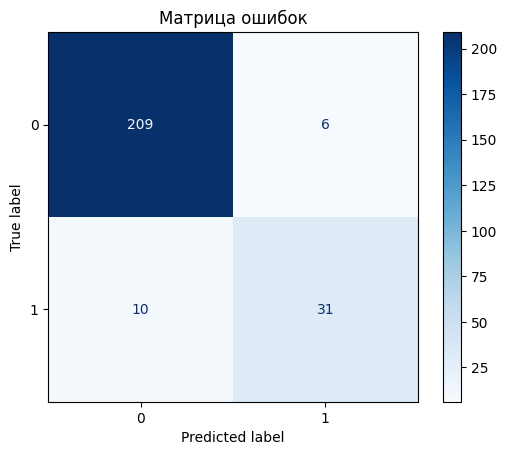


📌 Feature Importances:
                                            feature  importance
10                          Общее количество долгов    0.489030
39                      Позиция студента в рейтинге    0.347105
11                                 fromEkaterinburg    0.032025
21                                       Специалист    0.012057
35                            Код направления 1: 29    0.010352
24                                 Профильная Школа    0.007301
37                             Код направления 3: 3    0.003864
25                                              СПО    0.003106
4                                          Контракт    0.001533
20                                     Очно-заочная    0.001035
29                                           Сироты    0.000000
30                                       PostSoviet    0.000000
26                                  Боевые действия    0.000000
6                      Иностранный абитуриент (МОН)    0.000000
2               

C:\Users\333\AppData\Local\Temp\ipykernel_11316\4020708354.py:211: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')


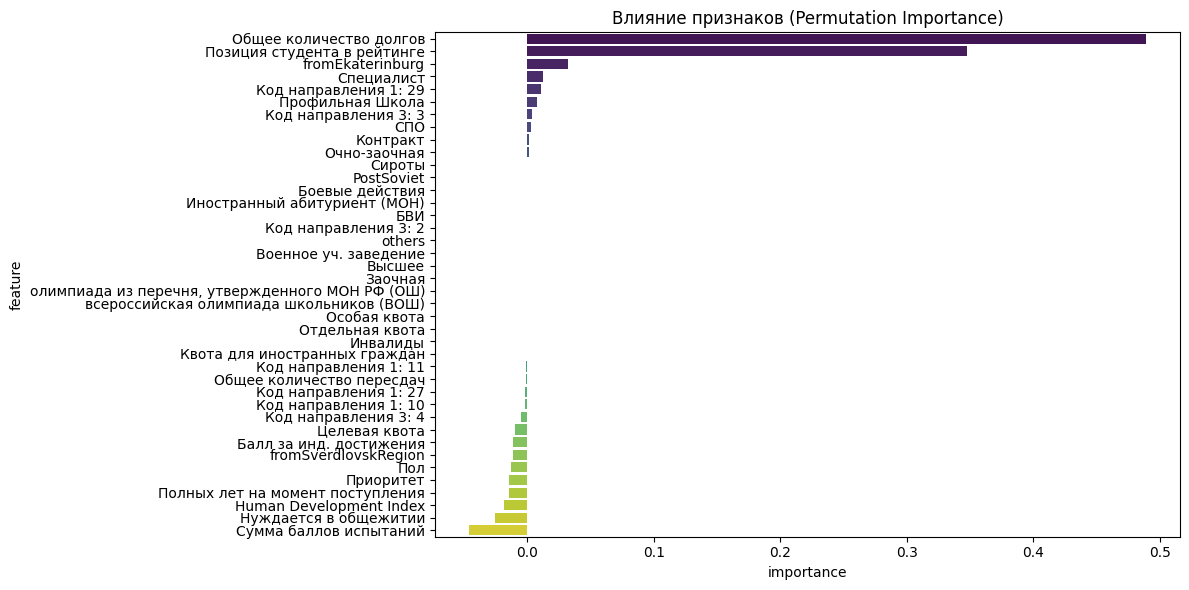

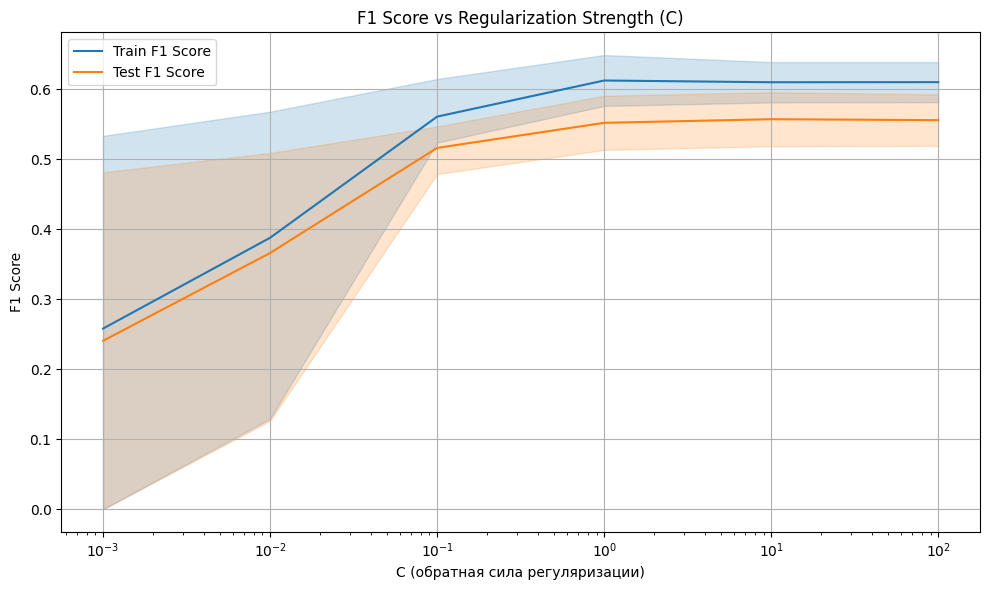

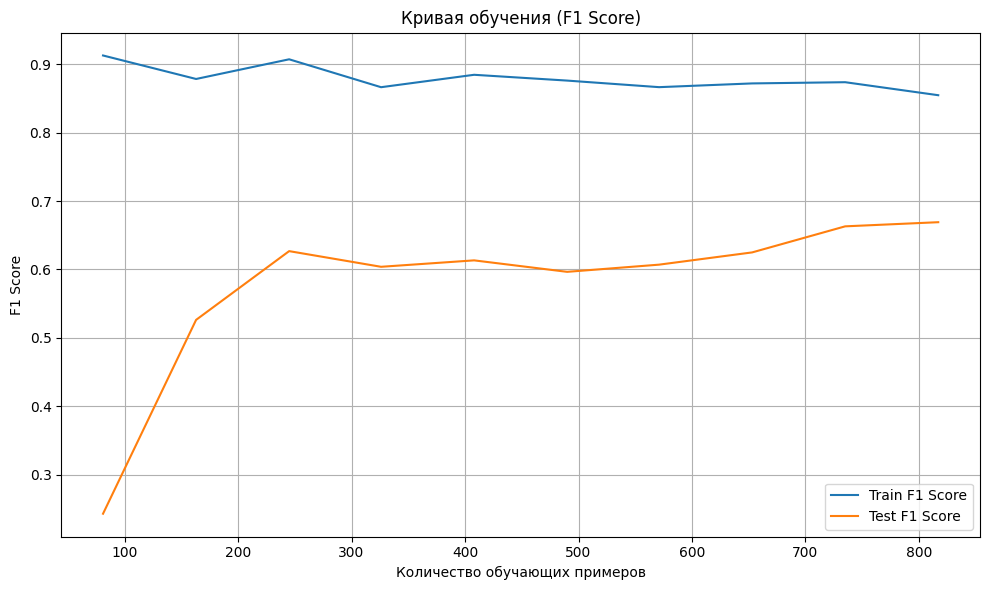

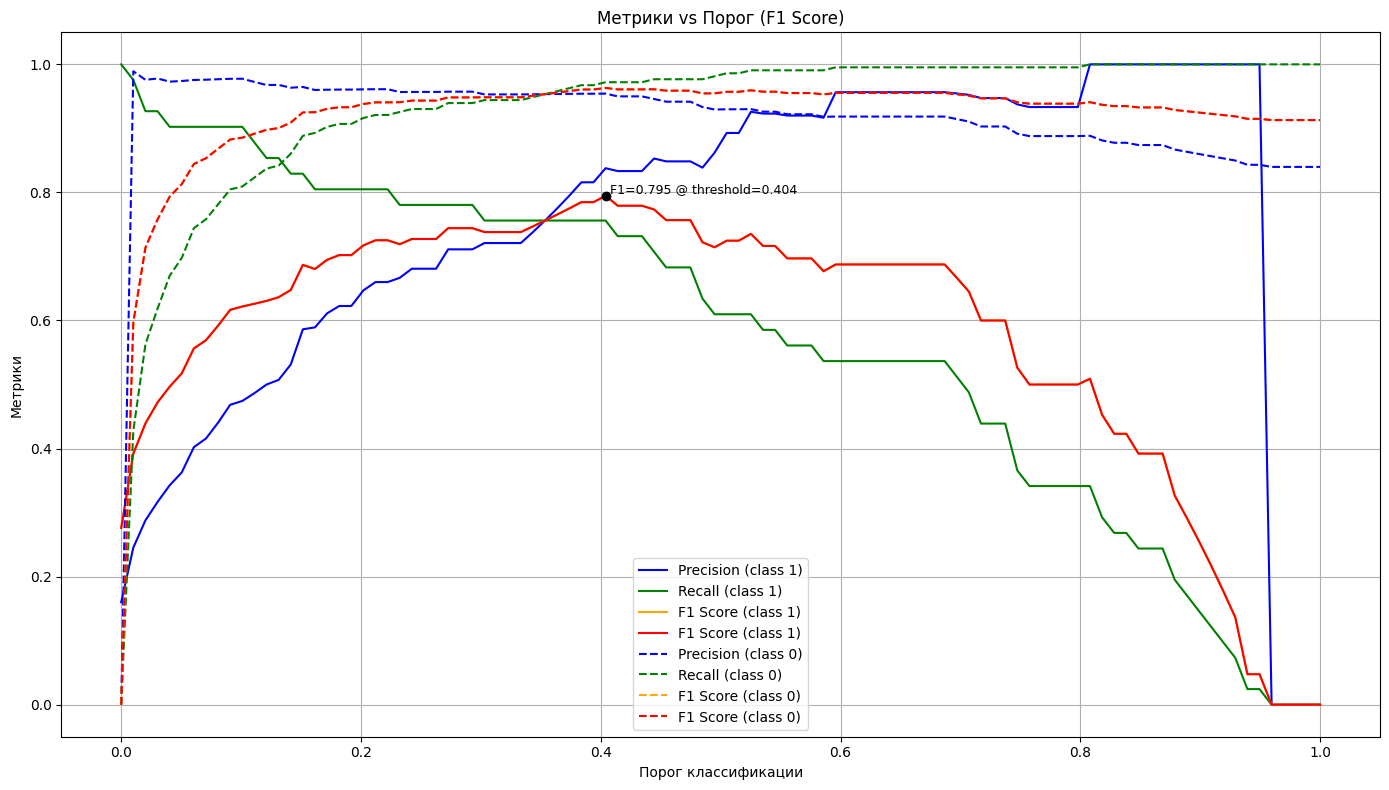

In [17]:
'''-----------------------------------------------------------------------------------------------------
                                        ИМПОРТ НЕОБХОДИМЫХ БИБЛИОТЕК
-----------------------------------------------------------------------------------------------------'''

import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, learning_curve, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, fbeta_score, make_scorer, precision_recall_fscore_support, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=3)

'''-----------------------------------------------------------------------------------------------------
                                            НАСТРОЙКИ
-----------------------------------------------------------------------------------------------------'''

BETA = 1

USE_STACKING = True

scale_pos_weight = 6.60

stacking_estimators = [
    ('hgb', HistGradientBoostingClassifier(
        class_weight='balanced',
        early_stopping=True,
        max_depth=5,
        max_iter=50,
        min_samples_leaf=5,
        random_state=42,
        scoring='f1'
    )),

    ('xgb', XGBClassifier(
        colsample_bytree=1.0,
        learning_rate=0.2,
        max_depth=6,
        min_child_weight=5,
        n_estimators=150,
        subsample=1.0,
        eval_metric='logloss',
        use_label_encoder=False,
        scale_pos_weight=scale_pos_weight,
        random_state=42
    )),
]

'''-----------------------------------------------------------------------------------------------------
                                            ПОДГОТОВКА ПАЙПЛАЙНА
-----------------------------------------------------------------------------------------------------'''

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=42, max_iter=1000))
])

param_grid = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2'],
    'clf__solver': ['liblinear'],
    'clf__class_weight': [None, 'balanced']
}

custom_scorer = make_scorer(fbeta_score, beta=BETA, pos_label=1)

'''-----------------------------------------------------------------------------------------------------
                                                ОБУЧЕНИЕ МОДЕЛИ
-----------------------------------------------------------------------------------------------------'''

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=StratifiedKFold(n_splits=3),
    scoring=custom_scorer,
    n_jobs=-1,
    return_train_score=True
)

grid_search.fit(X_train_s_bak_spec, y_train_s_bak_spec)

best_model = grid_search.best_estimator_
joblib.dump(best_model, '../../../../../data/models/final/filtered/ansamble_s_bak_spec_lof.joblib')

'''-----------------------------------------------------------------------------------------------------
                                           СТЕКИНГ: ОБУЧЕНИЕ
-----------------------------------------------------------------------------------------------------'''

if USE_STACKING:
    print("\n🔄 Используется стекинг. Обучение мета-модели...")

    # Пример мета-классификатора
    meta_clf = RandomForestClassifier(random_state=42)

    # Создаем стекинг-классификатор
    stacking_clf = StackingClassifier(
        estimators=stacking_estimators,
        final_estimator=meta_clf,
        cv=StratifiedKFold(n_splits=3),
        verbose=1,
        n_jobs=-1,
        passthrough=True  # Можно отключить, если не нужно передавать признаки дальше
    )

    # Обучаем стекинг на полном обучающем наборе
    stacking_clf.fit(X_train_s_bak_spec, y_train_s_bak_spec)

    # Заменяем best_model на стекинг
    best_model = stacking_clf
    print("✅ Стекинг успешно обучен.")
else:
    print("\n➡️ Стекинг отключен. Используется обычная модель.")

'''-----------------------------------------------------------------------------------------------------
                        ПОЛУЧЕНИЕ ЛУЧШЕГО ПОРОГА И СОЗДАНИЕ ОТЧЁТА С УЧЁТОМ ЭТОГО ПОРОГА
-----------------------------------------------------------------------------------------------------'''

y_probs = best_model.predict_proba(X_test_s_bak_spec)[:, 1]

thresholds = np.linspace(0, 1, 100)
f_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    f = fbeta_score(y_test_s_bak_spec, y_pred_thresh, beta=BETA, pos_label=1)
    f_scores.append(f)

best_idx = np.argmax(f_scores)
best_threshold = thresholds[best_idx]
best_f_score = f_scores[best_idx]

print(f"\n🎯 Лучший порог: {best_threshold:.3f}, F{BETA} для класса 1: {best_f_score:.3f}")

y_pred_s_bak_spec = (y_probs >= best_threshold).astype(int)

print(grid_search.best_params_)
print("🧠 Лучшая модель:", best_model)

# Вывод расширенного отчёта
precision_1 = precision_score(y_test_s_bak_spec, y_pred_s_bak_spec, pos_label=1)
recall_1 = recall_score(y_test_s_bak_spec, y_pred_s_bak_spec, pos_label=1)
f1_1 = f1_score(y_test_s_bak_spec, y_pred_s_bak_spec, pos_label=1)
f2_1 = fbeta_score(y_test_s_bak_spec, y_pred_s_bak_spec, beta=BETA, pos_label=1)

precision_0 = precision_score(y_test_s_bak_spec, y_pred_s_bak_spec, pos_label=0)
recall_0 = recall_score(y_test_s_bak_spec, y_pred_s_bak_spec, pos_label=0)
f1_0 = f1_score(y_test_s_bak_spec, y_pred_s_bak_spec, pos_label=0)
f2_0 = fbeta_score(y_test_s_bak_spec, y_pred_s_bak_spec, beta=BETA, pos_label=0)

acc = accuracy_score(y_test_s_bak_spec, y_pred_s_bak_spec)

print(f"\n📊 Расширенный отчёт по метрикам (F{BETA}):")
print("—" * 60)
print(f"{'':<8} | {'Precision':^9} | {'Recall':^7} | {'F1':^5} | {'F2':^5} | {'Support':^7}")
print("—" * 60)
print(f"Class 1 | {precision_1:.4f}    | {recall_1:.4f}   | {f1_1:.4f} | {f2_1:.4f} | {sum(y_test_s_bak_spec == 1):^7}")
print(f"Class 0 | {precision_0:.4f}    | {recall_0:.4f}   | {f1_0:.4f} | {f2_0:.4f} | {sum(y_test_s_bak_spec == 0):^7}")
print("—" * 60)
print(f"Accuracy: {acc:.4f}")
print("—" * 60)

'''-----------------------------------------------------------------------------------------------------
                                            СОЗДАНИЕ МАТРИЦЫ ОШИБОК
-----------------------------------------------------------------------------------------------------'''

cm = confusion_matrix(y_test_s_bak_spec, y_pred_s_bak_spec)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Матрица ошибок")
plt.savefig('ansamble/s_bak_spec/confusion_matrix_log_reg.png')
plt.show()

'''-----------------------------------------------------------------------------------------------------
                                          ВЫВОД ВЛИЯНИЯ ВСЕХ ПРИЗНАКОВ
-----------------------------------------------------------------------------------------------------'''

result = permutation_importance(
    best_model,
    X_test_s_bak_spec,
    y_test_s_bak_spec,
    scoring=custom_scorer,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

importances = result.importances_mean
features = X_train_s_bak_spec.columns

feature_importances = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\n📌 Feature Importances:")
print(feature_importances)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')
plt.title('Влияние признаков (Permutation Importance)')
plt.tight_layout()
plt.savefig('ansamble/s_bak_spec/feature_importance.png')
plt.show()

'''-----------------------------------------------------------------------------------------------------
                              ВЫВОД ЗАВИСИМОСТИ F-SCORE ОТ РЕГУЛЯРИЗАЦИИ (ПАРАМЕТР C)
-----------------------------------------------------------------------------------------------------'''

results = pd.DataFrame(grid_search.cv_results_)

results_filtered = results[[
    'param_clf__C',
    'mean_train_score',
    'mean_test_score'
]].copy()

results_filtered['param_clf__C'] = pd.to_numeric(results_filtered['param_clf__C'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_filtered, x='param_clf__C', y='mean_train_score', label=f'Train F{BETA} Score')
sns.lineplot(data=results_filtered, x='param_clf__C', y='mean_test_score', label=f'Test F{BETA} Score')
plt.xscale('log')
plt.title(f'F{BETA} Score vs Regularization Strength (C)')
plt.xlabel('C (обратная сила регуляризации)')
plt.ylabel(f'F{BETA} Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f'ansamble/s_bak_spec/f{BETA}_vs_C_log_reg.png')
plt.show()

'''-----------------------------------------------------------------------------------------------------
                                           ВЫВОД КРИВОЙ ОБУЧЕНИЯ
-----------------------------------------------------------------------------------------------------'''

train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model,
    X=X_train_s_bak_spec,
    y=y_train_s_bak_spec,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring=custom_scorer,
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label=f'Train F{BETA} Score')
plt.plot(train_sizes, test_scores_mean, label=f'Test F{BETA} Score')
plt.title(f'Кривая обучения (F{BETA} Score)')
plt.xlabel('Количество обучающих примеров')
plt.ylabel(f'F{BETA} Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f'ansamble/s_bak_spec/learning_curve_log_reg.png')
plt.show()

'''-----------------------------------------------------------------------------------------------------
                          ГРАФИКИ METRIC VS THRESHOLD ДЛЯ ОБОИХ КЛАССОВ
-----------------------------------------------------------------------------------------------------'''

thresholds = np.linspace(0, 1, 100)

precisions_1, recalls_1, f1_scores_1, f2_scores_1 = [], [], [], []
precisions_0, recalls_0, f1_scores_0, f2_scores_0 = [], [], [], []

for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)

    precisions_1.append(precision_score(y_test_s_bak_spec, y_pred_thresh, pos_label=1, zero_division=0))
    recalls_1.append(recall_score(y_test_s_bak_spec, y_pred_thresh, pos_label=1, zero_division=0))
    f1_scores_1.append(f1_score(y_test_s_bak_spec, y_pred_thresh, pos_label=1, zero_division=0))
    f2_scores_1.append(fbeta_score(y_test_s_bak_spec, y_pred_thresh, beta=BETA, pos_label=1, zero_division=0))

    precisions_0.append(precision_score(y_test_s_bak_spec, y_pred_thresh, pos_label=0, zero_division=0))
    recalls_0.append(recall_score(y_test_s_bak_spec, y_pred_thresh, pos_label=0, zero_division=0))
    f1_scores_0.append(f1_score(y_test_s_bak_spec, y_pred_thresh, pos_label=0, zero_division=0))
    f2_scores_0.append(fbeta_score(y_test_s_bak_spec, y_pred_thresh, beta=BETA, pos_label=0, zero_division=0))

max_f2_idx = np.argmax(f2_scores_1)
max_f2_value = f2_scores_1[max_f2_idx]
max_threshold = thresholds[max_f2_idx]

plt.figure(figsize=(14, 8))

plt.plot(thresholds, precisions_1, label='Precision (class 1)', color='blue')
plt.plot(thresholds, recalls_1, label='Recall (class 1)', color='green')
plt.plot(thresholds, f1_scores_1, label='F1 Score (class 1)', color='orange')
plt.plot(thresholds, f2_scores_1, label=f'F{BETA} Score (class 1)', color='red')

plt.plot(thresholds, precisions_0, '--', label='Precision (class 0)', color='blue')
plt.plot(thresholds, recalls_0, '--', label='Recall (class 0)', color='green')
plt.plot(thresholds, f1_scores_0, '--', label='F1 Score (class 0)', color='orange')
plt.plot(thresholds, f2_scores_0, '--', label=f'F{BETA} Score (class 0)', color='red')

plt.scatter(max_threshold, max_f2_value, color='black', zorder=5)
plt.text(max_threshold, max_f2_value,
         f' F{BETA}={max_f2_value:.3f} @ threshold={max_threshold:.3f}',
         fontsize=9, color='black', verticalalignment='bottom')

plt.title(f'Метрики vs Порог (F{BETA} Score)')
plt.xlabel('Порог классификации')
plt.ylabel('Метрики')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f'ansamble/s_bak_spec/threshold_metrics_log_reg.png')
plt.show()